In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df_institutes = pd.read_csv('data/out/dataInstitutes.csv', encoding='latin1', header=1)

In [3]:
df_institutes.columns

Index(['Instituto/Curso', ' Canc.por Reopção', 'Cancelamento por CRPL Zero',
       ' Decurso de Prazo Máximo P/ Conclusão de Curso', 'Desistência',
       'Prescrito', 'Limite de Trancamento', 'Transferência para outra IES',
       'Outro', 'Total Geral', ' Canc.por Reopção.1',
       'Cancelamento por CRPL Zero.1',
       ' Decurso de Prazo Máximo P/ Conclusão de Curso.1', 'Desistência.1',
       'Prescrito.1', 'Limite de Trancamento.1',
       'Transferência para outra IES.1', 'Outro.1', 'Total Geral.1',
       ' Canc.por Reopção.2', 'Cancelamento por CRPL Zero.2',
       ' Decurso de Prazo Máximo P/ Conclusão de Curso.2', 'Desistência.2',
       'Prescrito.2', 'Limite de Trancamento.2',
       'Transferência para outra IES.2', 'Outro.2', 'Total Geral.2',
       ' Canc.por Reopção.3', 'Cancelamento por CRPL Zero.3',
       ' Decurso de Prazo Máximo P/ Conclusão de Curso.3', 'Desistência.3',
       'Prescrito.3', 'Limite de Trancamento.3',
       'Transferência para outra IES.3', 'Ou

In [4]:
df_institutes.describe()

,Canc.por Reopção,Cancelamento por CRPL Zero,Decurso de Prazo Máximo P/ Conclusão de Curso,Desistência,Prescrito,Limite de Trancamento,Transferência para outra IES,Outro,Total Geral,Canc.por Reopção.1,...,Total Geral.6,Canc.por Reopção.7,Cancelamento por CRPL Zero.7,Decurso de Prazo Máximo P/ Conclusão de Curso.7,Desistência.7,Prescrito.7,Limite de Trancamento.7,Transferência para outra IES.7,Outro.7,Total Geral.7
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,11.857143,0.285714,167.000000,63.714286,56.714286,3.142857,3.000000,4.571429,310.285714,8.428571,...,96.142857,17.000000,0.0,1.000000,92.142857,0.142857,0.142857,0.714286,0.142857,111.285714
std,21.052525,0.611250,301.860385,112.952290,107.924780,7.594098,5.533117,8.382347,551.674852,15.062507,...,171.448067,30.283278,0.0,2.353394,163.998995,0.363137,0.363137,1.437336,0.363137,197.697293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.0,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,2.250000,0.000000,24.000000,20.000000,0.000000,0.000000,0.000000,1.000000,69.000000,3.000000,...,24.250000,1.750000,0.0,0.000000,16.500000,0.000000,0.000000,0.000000,0.000000,20.500000
50%,7.000000,0.000000,52.500000,28.500000,4.000000,0.000000,1.000000,2.000000,139.500000,3.500000,...,40.500000,11.000000,0.0,0.000000,42.500000,0.000000,0.000000,0.000000,0.000000,58.000000
75%,11.750000,0.000000,204.000000,54.000000,59.500000,0.000000,3.750000,3.000000,276.500000,5.000000,...,81.000000,16.000000,0.0,0.000000,96.250000,0.000000,0.000000,0.750000,0.000000,111.000000
max,83.000000,2.000000,1169.000000,446.000000,397.000000,22.000000,21.000000,32.000000,2172.000000,59.000000,...,673.000000,119.000000,0.0,7.000000,645.000000,1.000000,1.000000,5.000000,1.000000,779.000000


In [5]:
institutos = df_institutes['Instituto/Curso']
institutos

0     Instituto Amazônico de  Agriculturas Familiare...
1               Instituto de Ciências Biológicas - ICB 
2                  Instituto de Ciências da Arte - ICA 
3             Instituto de Ciências da Educação - ICED 
4                 Instituto de Ciências da Saúde - ICS 
5       Instituto de Ciências Exatas e Naturais - ICEN 
6                Instituto de Ciências Jurídicas - ICJ 
7        Instituto de Ciências Sociais Aplicadas  ICSA
8     Instituto de Educação Matemática e Científica ...
9     Instituto de Filosofia e Ciências Humanas - IFCH 
10                       Instituto de Geociências - IG 
11             Instituto de Letras e Comunicação - ILC 
12                      Instituto de Tecnologia - ITEC 
13                                          Total Geral
Name: Instituto/Curso, dtype: object

In [6]:
df_total = df_institutes.filter(regex=r'Total', axis=1)

xyear = [x for x in range(2014,2022)]

df_total = df_total.set_index(institutos)

df_total.iloc[0,1] = 0

df_total = df_total.astype(int)

df_total = df_total.rename(columns={a:b for a,b in zip(df_total.columns,xyear)})


In [7]:
df_total.shape

(14, 8)

In [8]:
len(df_total.index)

14

In [9]:
sigla = []
for i in df_total[:-1].index:
    sigla.append(re.findall(r'I[A-Z]+',i)[0])
sigla

['INEAF',
 'ICB',
 'ICA',
 'ICED',
 'ICS',
 'ICEN',
 'ICJ',
 'ICSA',
 'IEMCI',
 'IFCH',
 'IG',
 'ILC',
 'ITEC']

In [10]:
df_total.T

Instituto/Curso,Instituto Amazônico de Agriculturas Familiares  INEAF,Instituto de Ciências Biológicas - ICB,Instituto de Ciências da Arte - ICA,Instituto de Ciências da Educação - ICED,Instituto de Ciências da Saúde - ICS,Instituto de Ciências Exatas e Naturais - ICEN,Instituto de Ciências Jurídicas - ICJ,Instituto de Ciências Sociais Aplicadas  ICSA,Instituto de Educação Matemática e Científica - IEMCI,Instituto de Filosofia e Ciências Humanas - IFCH,Instituto de Geociências - IG,Instituto de Letras e Comunicação - ILC,Instituto de Tecnologia - ITEC,Total Geral
2014,0,87,122,236,149,415,34,280,12,266,63,130,378,2172
2015,0,44,26,27,75,172,30,149,22,72,69,167,244,1097
2016,0,18,16,38,79,24,115,19,30,76,29,157,30,631
2017,0,88,100,99,154,315,40,424,16,206,187,71,234,1934
2018,0,116,165,87,241,620,188,646,71,474,110,413,859,3990
2019,2,48,56,68,80,167,30,172,20,137,41,87,261,1169
2020,2,30,32,23,49,114,15,66,18,86,28,52,158,673
2021,13,37,28,18,70,123,13,125,7,75,53,63,154,779


In [11]:
def plotting(df):
    global xyear, sigla
    lenght = df.shape[0]
    fig, axs = plt.subplots(int(np.ceil(lenght/2)),2, figsize=(12,30))
    for index, inst in enumerate(df.index):
        y = index%2
        x = int(np.floor(index/2))
        v = df.loc[inst]
        axs[x,y].set_title(inst)
        sns.barplot(y=v,x=df.columns, ax=axs[x,y])
        # axs[x,y].set_xticklabels(sigla)
        # axs[x,y].set_ylabel('')
        # axs[x,y].set_xlabel('Age')
        # axs[x,y].bar(xyear, v.values)
        # axs[x,y].set_xticklabels(axs[x,y].get_xticklabels(), rotation=45)

c:\Users\gabri\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


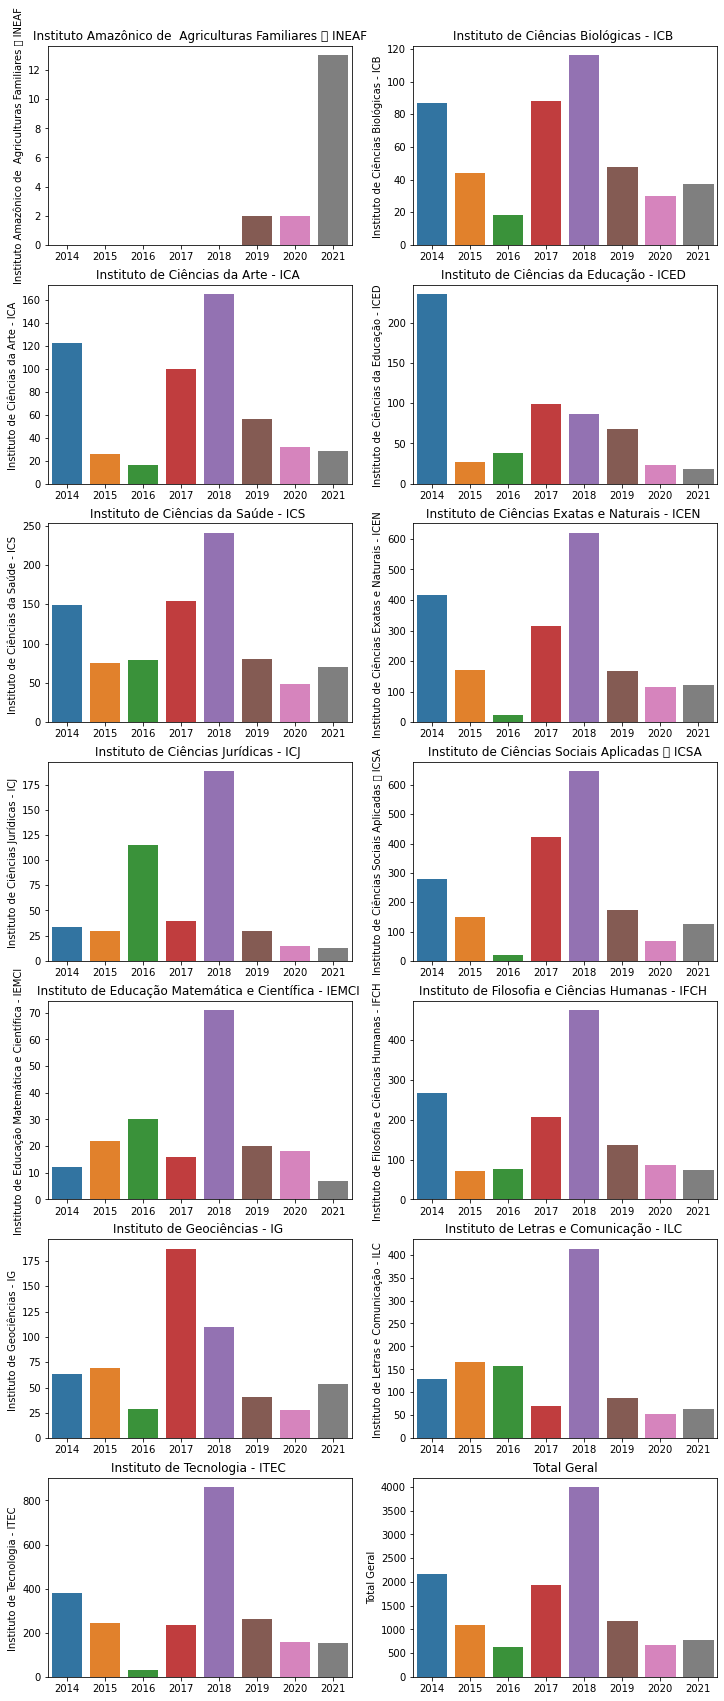

In [12]:
plotting(df_total)

In [13]:
df_inv = df_total[:-1].T
df_inv

Instituto/Curso,Instituto Amazônico de Agriculturas Familiares  INEAF,Instituto de Ciências Biológicas - ICB,Instituto de Ciências da Arte - ICA,Instituto de Ciências da Educação - ICED,Instituto de Ciências da Saúde - ICS,Instituto de Ciências Exatas e Naturais - ICEN,Instituto de Ciências Jurídicas - ICJ,Instituto de Ciências Sociais Aplicadas  ICSA,Instituto de Educação Matemática e Científica - IEMCI,Instituto de Filosofia e Ciências Humanas - IFCH,Instituto de Geociências - IG,Instituto de Letras e Comunicação - ILC,Instituto de Tecnologia - ITEC
2014,0,87,122,236,149,415,34,280,12,266,63,130,378
2015,0,44,26,27,75,172,30,149,22,72,69,167,244
2016,0,18,16,38,79,24,115,19,30,76,29,157,30
2017,0,88,100,99,154,315,40,424,16,206,187,71,234
2018,0,116,165,87,241,620,188,646,71,474,110,413,859
2019,2,48,56,68,80,167,30,172,20,137,41,87,261
2020,2,30,32,23,49,114,15,66,18,86,28,52,158
2021,13,37,28,18,70,123,13,125,7,75,53,63,154


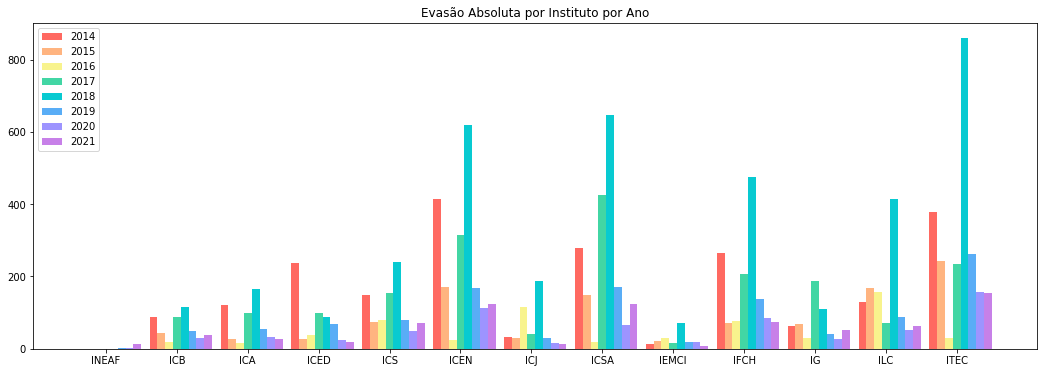

In [14]:
fig = plt.figure(figsize=(18,6))

bar_width = 0.11
positions = np.arange(len(df_inv.columns))

colors = ['#ff6961',
'#ffb480',
'#f8f38d',
'#42d6a4',
'#08cad1',
'#59adf6',
'#9d94ff',
'#c780e8']

ax = fig.add_subplot(1,1,1)

ax.bar(positions - 3*bar_width, df_inv.loc[2014], width=bar_width, color=colors[0], label = '2014')
ax.bar(positions - 2*bar_width, df_inv.loc[2015], width=bar_width, color=colors[1], label='2015')
ax.bar(positions - bar_width, df_inv.loc[2016], width=bar_width, color=colors[2], label = '2016')
ax.bar(positions, df_inv.loc[2017], width=bar_width, color=colors[3], label = '2017')
ax.bar(positions + bar_width, df_inv.loc[2018], width=bar_width, color=colors[4], label= '2018')
ax.bar(positions + 2*bar_width, df_inv.loc[2019], width=bar_width, color=colors[5], label = '2019')
ax.bar(positions + 3*bar_width, df_inv.loc[2020], width=bar_width, color=colors[6], label = '2020')
ax.bar(positions + 4*bar_width, df_inv.loc[2021], width=bar_width, color=colors[7], label = '2021')
ax.legend(loc='upper left')

ax.set_title('Evasão Absoluta por Instituto por Ano')
ax.set_xticks(range(0,13))
ax.set_xticklabels(sigla)

plt.show()


In [15]:
df_inv.sum().sum()

12445

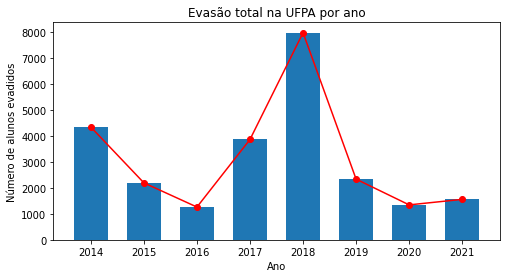

In [16]:
plt.figure(figsize=(8,4))

plt.bar(x=df_total.sum().index ,height=df_total.sum().values, width=0.65)
plt.plot(df_total.sum(),'ro-')
plt.title('Evasão total na UFPA por ano')
plt.xlabel('Ano')
plt.ylabel('Número de alunos evadidos')
   

plt.show()

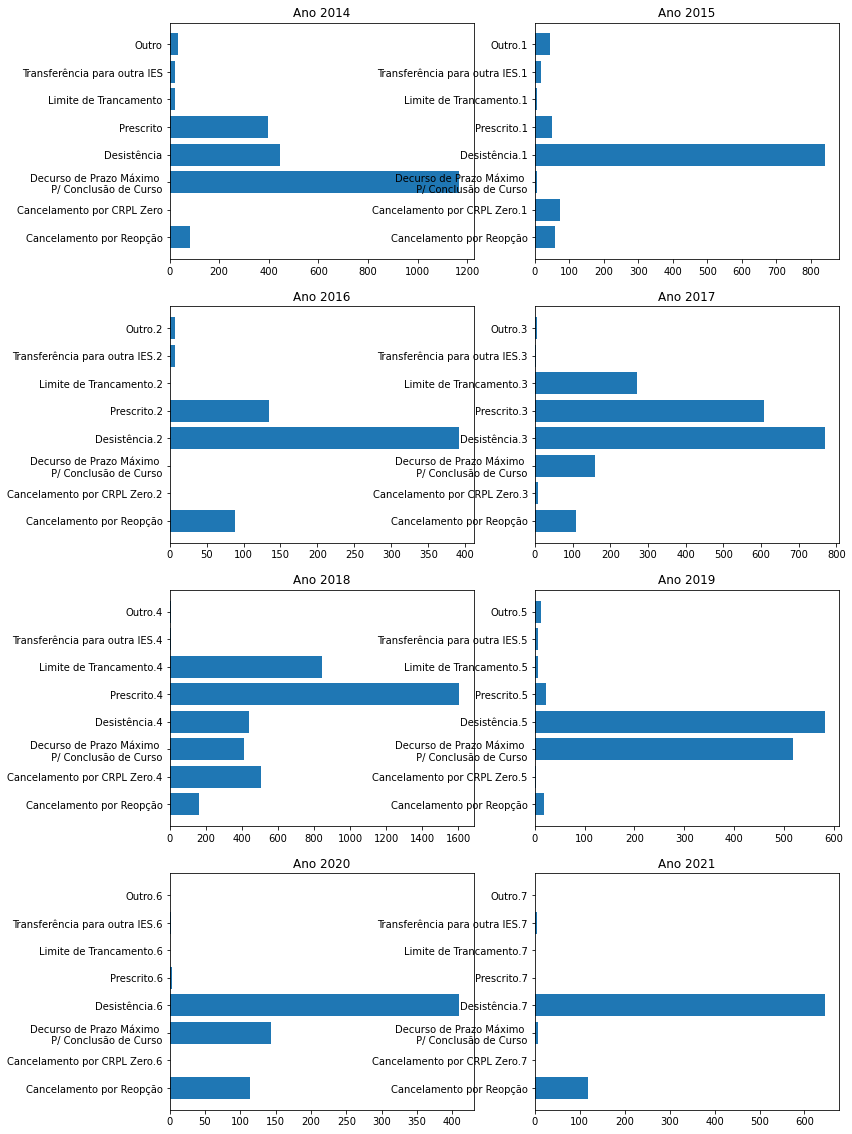

In [17]:
re.compile(r'[A-Za-záéíúâêãõç]+')

fig, axs = plt.subplots(4,2,figsize=(12,20))
for t in range(0,8):
    x = int(np.floor(t/2))
    y = t%2
    # print(df_institutes.iloc[13,1*t:9*t])
    data = df_institutes.iloc[13,1+t*9:9*(t+1)]
    category = list(data.index)
    category[2] = 'Decurso de Prazo Máximo \n P/ Conclusão de Curso'
    category[0] = 'Cancelamento por Reopção'
    axs[x,y].barh(width=data,y=category)
    axs[x,y].set_title(f'Ano {2014+t}')
    

In [31]:
var = lambda t: df_institutes.iloc[13,1+t*9:9*(t+1)]/df_institutes.iloc[13,1+t*9:9*(t+1)].sum()*100
var = {f'Ano {2014+t}':list(var(t)) for t in range(8)}

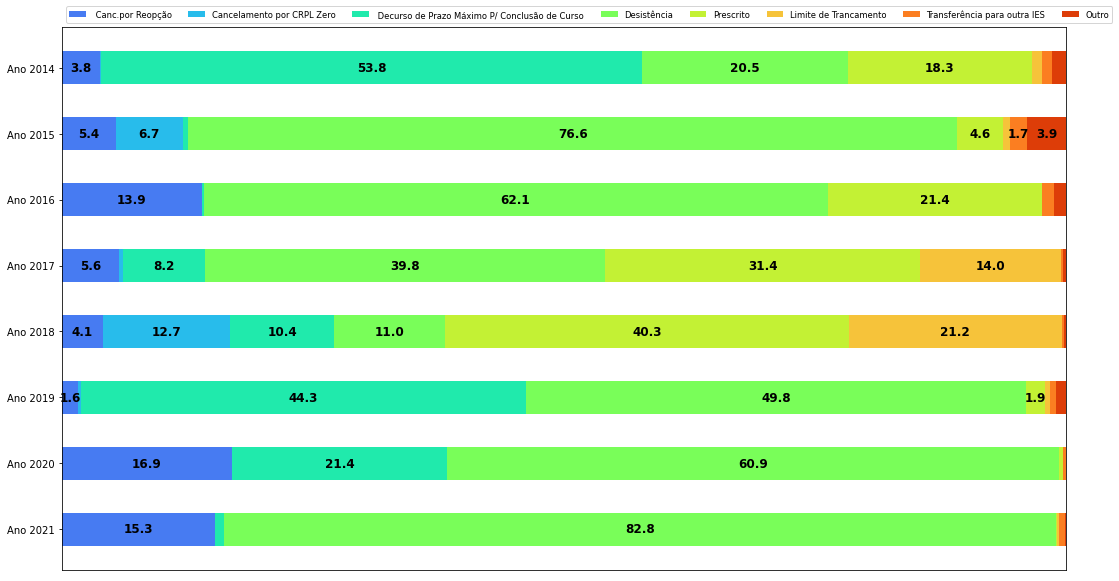

In [100]:
category_names = list(cat)
results = var


def survey(results, category_names):
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('turbo')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig = plt.figure(figsize=(18,10))
    ax = fig.add_subplot(1,1,1)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'black'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            if c>1.5:
                ax.text(x, y, f'{round(c,1)}', ha='center', va='center',
                        color=text_color, fontdict={'weight': 'bold','size':12})
            else:
                pass
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
    return fig, ax

survey(results, category_names)
plt.savefig('fig.pdf')